# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Prompt Engineering for Instruction-Tuned LLM: Iterative Prompt Development </center>
***



When you build applications with large language models, it is difficult to come up with a prompt that you will end up using in the final application on your first attempt. 
However as long as you have a good process to iteratively make your prompt better, then you'll be able to come to something that works well for the task you want to achieve.
You may have heard that when training a machine learning model, it rarely works the first time. Prompting also does not usually work from the first time. In this article, we will explore the process of getting to prompts that work for your application through iterative development.

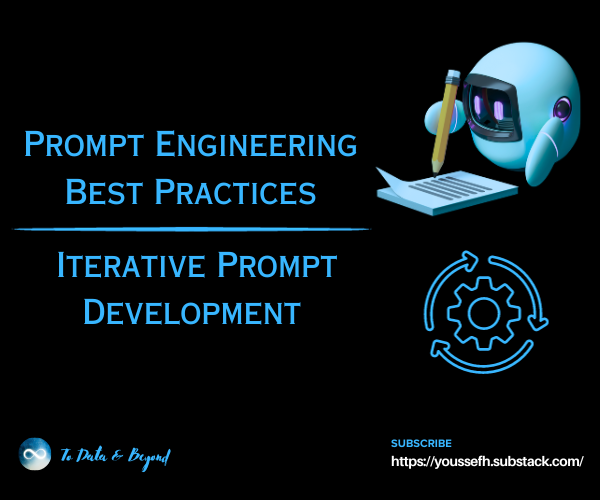


#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Iterative Nature of Prompt Engineering </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Setting Working Environment & Getting Started </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3.  Overcoming Too-Long LLM Results </a></li> 
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Force the LLM to Focus on Certain Details </a></li>
    <li><a href="#5" target="_self" rel=" noreferrer nofollow">5. Getting Complex Responses </a></li> 
    <li><a href="#6" target="_self" rel=" noreferrer nofollow">6. References </a></li>
    
</ul>
</div>


***

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Iterative Nature of Prompt Engineering </b></div>

If you've taken a machine learning class before, you will probably have seen this diagram saying that machine learning development is an iterative process. You get the data, train your model, and that gives you an experimental result. You can then look at that output, maybe do error analysis, figure out where it's working or not working, and then maybe even change your idea of exactly what problem you want to solve or how to approach it. Then change implementation, run another experiment, and iterate over and over to get to an effective machine learning model. 

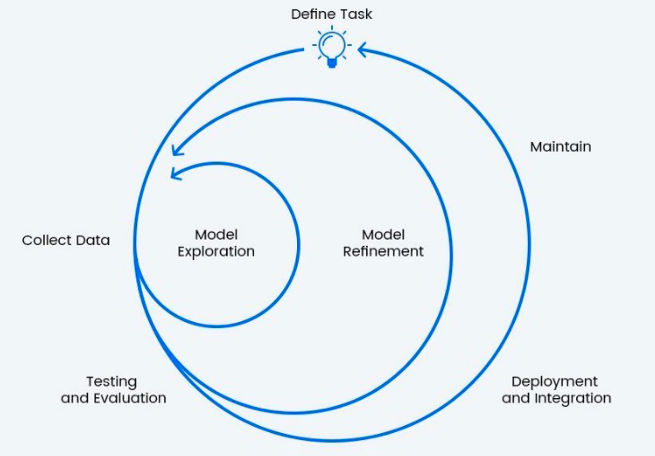



When you are writing prompts to develop an application using an LLM, the process can be quite similar, where you have an idea of what you want to do, and the task you want to complete, and you can then take a first attempt at writing a prompt that hopefully is clear and specific, and maybe, if appropriate, gives the system time to think.
Then you can run it and see what result you get. If it doesn't work well enough the first time, then the iterative process of figuring out why the instructions, for example, were not clear enough, or why it didn't give the algorithm enough time to think, allows you to refine the idea, refine the prompt, and so on, and to go around this loop multiple times until you end up with a prompt that works for your application.


> This too is why I personally have not paid as much attention to the internet articles that say 30 perfect prompts, because I think, there probably isn't a perfect prompt for everything under the sun. It's more important that you have a process for developing a good prompt for your specific application.

Andrew NG

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Setting Working Environment & Getting Started </b></div>



Let's start by setting up the working environment. We will import OpenAI and OS packages, define the OpenAI API key, and define the get_completion which will take the prompt and return the response.

In [1]:
!pip install openai

  Obtaining dependency information for openai from https://files.pythonhosted.org/packages/e7/44/5ece9adb8b5943273c845a1e3200168b396f556051b7d2745995abf41584/openai-1.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for httpx<1,>=0.23.0 from https://files.pythonhosted.org/packages/39/9b/4937d841aee9c2c8102d9a4eeb800c7dad25386caabb4a1bf5010df81a57/httpx-0.26.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions<5,>=4.7 from https://files.pythonhosted.org/packages/b7/f4/6a90020cd2d93349b442bfcb657d0dc91eee65491600b2cb1d388bc98e6b/typing_extensions-4.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for httpcore==1.* from https://files.pythonhosted.org/packages/56/ba/78b0a99c4da0ff8b0f59defa2f13ca4668189b134bd9840b6202a93d9a0f/httpcore-1.0.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.8 MB/s eta 0:00:00
   ━━

In [2]:
from openai import OpenAI
import openai
import os
from kaggle_secrets import UserSecretsClient

user_secrets = UserSecretsClient()
openai.api_key = user_secrets.get_secret("openai_api")
client = OpenAI(
    # This is the default and can be omitted
    api_key=openai.api_key,
)

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content


Here's a fact sheet for a laptop with a description of its technical details. It talks about the construction, has the dimensions, options for the laptop, materials, and so on.

In [3]:
fact_sheet_laptop = """
OVERVIEW

Introducing our sleek Laptop Series, an embodiment of cutting-edge design and functionality for modern workspaces.
Part of a sophisticated family of tech-inspired devices, including laptops, docking stations, accessories, and more.
Available in multiple colors and finishes to seamlessly integrate with your personal or professional aesthetic.
Crafted with premium materials for a durable and stylish appeal.
Suitable for a variety of environments, whether it's your home office or a corporate setting.
Engineered for superior performance and productivity, making it an ideal choice for professionals.
DESIGN

The laptop is available in various color options, allowing you to personalize it to your preference.
Choose between different finishes, including brushed aluminum, matte black, glossy white, or chrome accents.
Select from configurations with a standard display or a touchscreen option.
Options for additional features such as a backlit keyboard, fingerprint sensor, or face recognition technology.
Sleek and lightweight design for portability without compromising on power.
SPECIFICATIONS

Powerful Intel/AMD processors for seamless multitasking and high-performance computing.
Ultra-thin design with dimensions:
WIDTH 35 CM | 13.78"
DEPTH 24 CM | 9.45"
HEIGHT 1.5 CM | 0.59"
Crisp and vibrant display with a resolution tailored for immersive work or entertainment experiences.
OPTIONS

Choose between SSD or HDD storage options for speed and capacity tailored to your needs.
Various connectivity options, including USB-C, HDMI, and Thunderbolt for versatile compatibility.
Different RAM configurations to suit your processing requirements.
Options for operating systems, catering to both Windows and MacOS preferences.
MATERIALS

Durable aluminum casing for a premium look and robust protection.
High-resolution display with anti-glare coating for comfortable viewing in any lighting condition.
Cutting-edge cooling technology to ensure optimal performance during extended usage.
COUNTRY OF ORIGIN

Crafted with precision in state-of-the-art facilities in Japan, combining traditional craftsmanship with technological innovation.

"""

Let's say you want to take this fact sheet and help a marketing team write a description for an online retail website. The prompt here says, your task is to help a marketing team create the description for a retail website with a product based on the technical fact sheet, write a product description, and so on. Let's run this and observe the returned results.

In [4]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
print(response)

Introducing our sleek Laptop Series, a perfect blend of cutting-edge design and functionality for modern workspaces. This laptop is part of a sophisticated family of tech-inspired devices, including docking stations, accessories, and more. With its multiple color options and finishes, it seamlessly integrates with your personal or professional aesthetic.

Crafted with premium materials, this laptop exudes durability and style. Whether you're working from your home office or a corporate setting, this laptop is suitable for a variety of environments. Engineered for superior performance and productivity, it is the ideal choice for professionals.

The laptop is available in various color options, allowing you to personalize it to your preference. Choose between brushed aluminum, matte black, glossy white, or chrome accents for a sleek and modern look. Additionally, you can select from configurations with a standard display or a touchscreen option.

Customize your laptop further with additi

But when I look at this, I go, boy, this is long. It's done a nice job doing exactly what I asked it to, which is to start from the technical fact sheet and write a product description. But when I look at this, I go, this is kind of long. Maybe we want it to be a little bit shorter.

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Overcoming Too-Long LLM Results </b></div>


In the previous section, I   wrote a prompt and got a result. I'm not that happy with it because it's too long. So, I will then clarify my prompt and say, use at most 50 words to try to give better guidance on the desired length of this. Let's run it again.

In [5]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
print(response)


Introducing our sleek Laptop Series, a cutting-edge embodiment of design and functionality. Available in multiple colors and finishes, it seamlessly integrates with your personal or professional aesthetic. Crafted with premium materials, it offers durability and style. Engineered for superior performance, it's perfect for professionals in any environment.


This looks like a much nicer short description of the product. Let's check the length of this response. I'm going to take the response, split it according to where the space is, and then, you know, print out the length. 
So it's 47 words. It's not bad. Large language models are okay, but not that great at following instructions about a very precise word count. Sometimes it will print out something with 60 or 65 and so on words, but it's within reason. Some of the things you could try to do would be, to say use at most three sentences.

In [6]:
len(response.split())

47

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Force the LLM to Focus on Certain Details  </b></div>


As we continue to refine this text for our websites, we might decide that our  website isn't selling directly to consumers. However, it is intended to sell laptops to laptop retailers that would be more interested in the technical details of the laptop. 


In that case, you can take this prompt and say, I want to modify this prompt to get it to be more precise about the technical details. I'm going to say, this description is intended for laptop retailers, so should be technical and focus on technical details.

In [7]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for laptop retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
print(response)

Introducing our sleek Laptop Series, crafted with premium materials for a durable and stylish appeal. The laptop is available in multiple colors and finishes, including brushed aluminum, matte black, glossy white, or chrome accents. It features a high-resolution display with anti-glare coating for comfortable viewing in any lighting condition. With powerful Intel/AMD processors and various storage and RAM options, this laptop is engineered for superior performance and productivity. It also offers versatile connectivity options and comes with cutting-edge cooling technology. Choose our Laptop Series for a sophisticated and reliable device that seamlessly integrates with your personal or professional aesthetic.

Product IDs: 
1. WIDTH35
2. HEIGHT1
3. DEPTH24
4. WIDTH13
5. HEIGHT0
6. DEPTH9
7. WIDTH45
8. HEIGHT1
9. DEPTH5


By changing the prompt, you can get it to focus more on specific characters, and on specific characteristics you want. I might decide at the end of the description, I also wanted to include the product ID. I can add the instruction at the end of the description prompt to include every 7-character product ID in the technical specification, and let's run it, and see what happens.

In [8]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for laptop retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_laptop}```
"""
response = get_completion(prompt)
print(response)

Introducing our sleek Laptop Series, crafted with premium materials for a durable and stylish appeal. The laptop is available in multiple colors and finishes, including brushed aluminum, matte black, glossy white, or chrome accents. It features a high-resolution display with anti-glare coating for comfortable viewing in any lighting condition. With powerful Intel/AMD processors and various storage and RAM options, this laptop is engineered for superior performance and productivity. It also offers cutting-edge cooling technology for optimal performance during extended usage. Choose our Laptop Series for a sophisticated and reliable device that seamlessly integrates with your personal or professional aesthetic.

Product IDs: 
1. WIDTH35
2. HEIGHT1
3. WIDTH13
4. HEIGHT0
5. DEPTH24
6. HEIGHT9
7. WIDTH9
8. HEIGHT4
9. HEIGHT5
10. HEIGHT0


This is a short example of the iterative prompt development that many developers will go through. That is why it is worthwhile to often take a first attempt at writing a prompt, see what happens, and then go from there to iteratively refine the prompt to get closer and closer to the result that you need.

<a id="5"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 5. Getting Complex Responses  </b></div>


Let's take a more complex prompt to give you a better idea of the capability of chatGPT. After the description, I will ask to include a table that gives the product dimensions and format everything as HTML. In practice, you end up with a prompt like this only after multiple iterations.

In [9]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for laptop retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Technical specifications: ```{fact_sheet_laptop}```
"""

response = get_completion(prompt)
print(response)

<div>
  <h2>Product Description</h2>
  <p>
    Introducing our sleek Laptop Series, an embodiment of cutting-edge design and functionality for modern workspaces. Part of a sophisticated family of tech-inspired devices, including laptops, docking stations, accessories, and more. Available in multiple colors and finishes to seamlessly integrate with your personal or professional aesthetic. Crafted with premium materials for a durable and stylish appeal. Suitable for a variety of environments, whether it's your home office or a corporate setting. Engineered for superior performance and productivity, making it an ideal choice for professionals.
  </p>
  <p>
    The laptop is available in various color options, allowing you to personalize it to your preference. Choose between different finishes, including brushed aluminum, matte black, glossy white, or chrome accents. Select from configurations with a standard display or a touchscreen option. Options for additional features such as a backli

Let's display the HTML to see if this is even valid HTML and see if this works.

In [10]:
from IPython.display import display, HTML
display(HTML(response))

Name of Dimension,Measurements (inches)
Width,"13.78"""
Depth,"9.45"""
Height,"0.59"""


<a id="6"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 6. References  </b></div>


# <div style="box-shadow: rgba(240, 46, 170, 0.4) -5px 5px inset, rgba(240, 46, 170, 0.3) -10px 10px inset, rgba(240, 46, 170, 0.2) -15px 15px inset, rgba(240, 46, 170, 0.1) -20px 20px inset, rgba(240, 46, 170, 0.05) -25px 25px inset; padding:20px; font-size:30px; font-family: consolas; display:fill; border-radius:15px; color: rgba(240, 46, 170, 0.7)"> <b> ༼⁠ ⁠つ⁠ ⁠◕⁠‿⁠◕⁠ ⁠༽⁠つ Thank You!</b></div>

<p style="font-family:verdana; color:rgb(34, 34, 34); font-family: consolas; font-size: 16px;"> 💌 Thank you for taking the time to read through my notebook. I hope you found it interesting and informative. If you have any feedback or suggestions for improvement, please don't hesitate to let me know in the comments. <br><br> 🚀 If you liked this notebook, please consider upvoting it so that others can discover it too. Your support means a lot to me, and it helps to motivate me to create more content in the future. <br><br> ❤️ Once again, thank you for your support, and I hope to see you again soon!</p>